<a href="https://colab.research.google.com/github/deepalakshmi21/Brain-Tumor-Analysis/blob/master/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


**Defining the image size**

In [ ]:
image_size = [224,224]
data_path = 'Data'

**Downloading the weights from vgg model**

In [ ]:
vgg = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 5s 0us/step


In [ ]:
vgg.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(?, 7, 7, 512) dtype=float32>

In [ ]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [ ]:
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [ ]:
preds = Dense(2,activation='softmax')(x)

In [ ]:

model = Model(inputs = vgg.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Pre-processing**

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('drive/My Drive/Datasets/' ,
                                                  target_size=(224,224),
                                                  color_mode='rgb' ,
                                                  batch_size=32,
                                                  class_mode='categorical' ,
                                                  shuffle = True)

Found 510 images belonging to 2 classes.


**Compiling the model**

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

**Accuracy and Loss**

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
r = model.fit_generator(generator=train_generator,
                        steps_per_epoch=step_size_train,
                        epochs=5)

Epoch 1/5
15/15 [==============================] - 211s 14s/step - loss: 0.7951 - acc: 0.5481
Epoch 2/5
15/15 [==============================] - 14s 944ms/step - loss: 0.5997 - acc: 0.6402
Epoch 3/5
15/15 [==============================] - 2s 108ms/step - loss: 0.3679 - acc: 0.8577
Epoch 4/5
15/15 [==============================] - 2s 111ms/step - loss: 0.1930 - acc: 0.9247
Epoch 5/5
15/15 [==============================] - 2s 106ms/step - loss: 0.2121 - acc: 0.9163


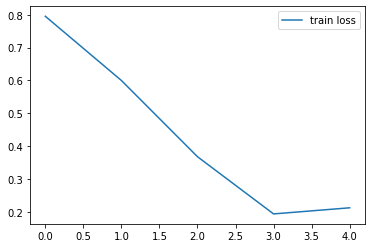

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

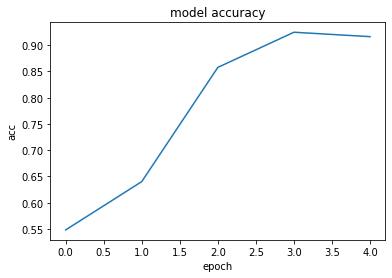

In [ ]:
plt.plot(r.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('brain_tumor.h5')

**Prediction**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('brain_tumor.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
img_path = 'drive/My Drive/Datasets/testing set/tumor/000437.png'

In [ ]:
img = image.load_img(img_path,target_size=(224,224))
x= image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [ ]:
rslt = model.predict(img_data)
print(rslt)

[[0.9319864  0.06801364]]


In [ ]:
if rslt[0][0] == 1:
  prediction = 'Not a Brain Tumor'
else:
  prediction = 'Brain Tumor'
print(prediction)

Brain Tumor
